In [113]:

import statsmodels.datasets
data = statsmodels.datasets.co2.load_pandas().data
data.co2.interpolate(inplace=True)
data

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


Text(0.5, 0, 'Week')

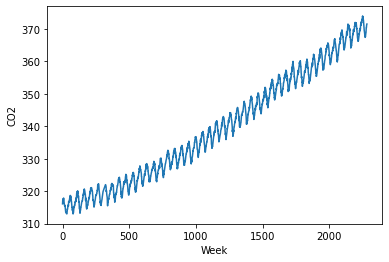

In [120]:
import matplotlib.pyplot as plt

# convert into x and y
x = list(range(len(data.index)))
y = data.co2

# plot the co2 data
fig = plt.figure()
plt.plot(x,y)
plt.ylabel('CO2')
plt.xlabel('Week')

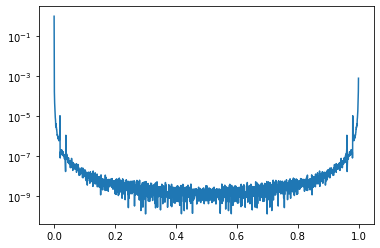

In [123]:
import numpy as np

# apply fast fourier transform and take absolute values
f=abs(np.fft.fft(y))

# get the list of frequencies
num=np.size(x)
freq = [i / num for i in list(range(num))]

# get the list of spectrums
spectrum=f.real*f.real+f.imag*f.imag # se prende il valore assoluto di una funzione complessa, ovviamente non ha parte immaginaria è nulla
nspectrum=spectrum/spectrum[0] # non capisco perché divida per il valore più alto

# plot nspectrum per frequency, with a semilog scale on nspectrum
plt.semilogy(freq,nspectrum)

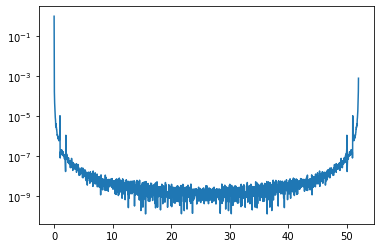

In [116]:
# improve the plot by adding periods in number of weeks rather than  frequency
import pandas as pd
results = pd.DataFrame({'freq': freq, 'nspectrum': nspectrum})
results['period'] = results['freq'] / (1/52)
plt.semilogy(results['period'], results['nspectrum'])

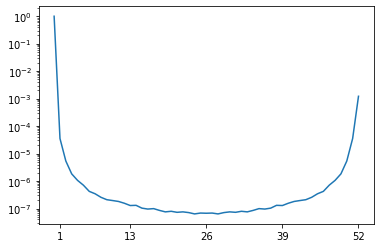

In [117]:
# improve the plot by convertint the data into grouped per week to avoid peaks
results['period_round'] = results['period'].round()
grouped_week = results.groupby('period_round')['nspectrum'].sum()
plt.semilogy(grouped_week.index, grouped_week)
plt.xticks([1, 13, 26, 39, 52])
plt.show()

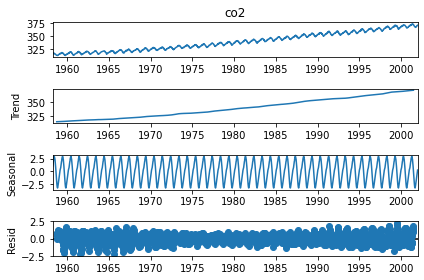

In [8]:
# use the seasonal_decompose function to observe the same conclusion
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(data.co2)
resplot = res.plot()

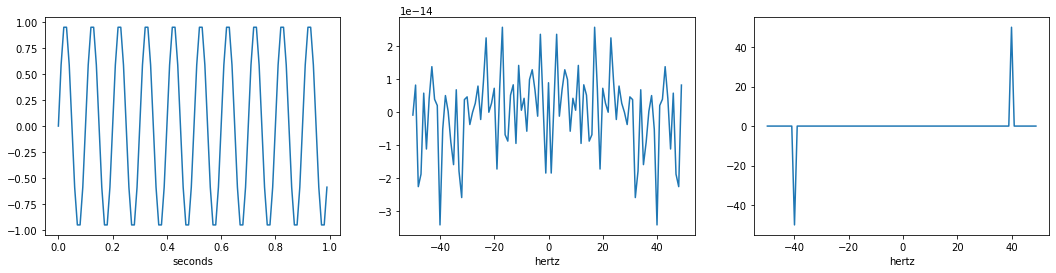

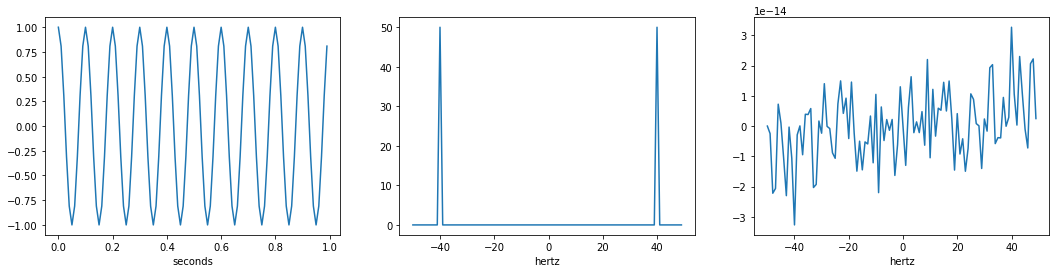

In [112]:
from scipy.fft import fft
sr = 100 # sampling rate [Hz]
f = 10 # frequency [Hz]
t = np.arange(0, 1, 1/sr) # seconds to go
A = 1

for s in [A * np.sin(2 * np.pi * f * t), A * np.cos(2 * np.pi * f * t)]:
    fig, ax = plt.subplots(1, 3, figsize=(6*3, 4))
    y = fft(s)
    ax[0].plot(t, s) 
    ax[0].set_xlabel("seconds")
    ax[1].plot(np.arange(-sr/2, sr/2), y.real)
    ax[1].set_xlabel("hertz")
    ax[2].plot(np.arange(-sr/2, sr/2), y.imag)
    ax[2].set_xlabel("hertz")
    

# s = A * np.sin(2 * np.pi * f * t)

un po' di contesto. la trsformata di Fuorier per il coseno corrispone a due delta di dirac centrate una in -f (f: freq del coseno) del coseno e una alla frequenza, perciò ha solo parte reale. 
La stessa cosa per il seno, ma in questo caso ha solo parte immaginaria. Inoltre, poiché la trasformata di un segnale reale è hermitiana, la parte immaginaria è funzione dispari, mentre la parte reale è funzione pari, come è chiaramente visibile dai plot. 
Poiché hermitiana, possiamo limitarci allo studio della parte positiva della trasformata senza perdere informazione.

il plot della parte reale per il seno e la parte immaginaria per il coseno mostrano gli errori nella trasformazione di Fourier dovuti al calcolo a precisione finita. considerando che la precisione di macchina per un float 64 bit è 2^(-52), qui abbiamo un algoritmo che perde due ordini di grandezza in precisione. Neanche male, dai.  

Rimane una domanda: perché studiare solo il valore assoluto della funzione? perdiamo informazione ma la condensiamo in un unica dimensione.